# **Mileage Prediction - Linear Regression Analysis**

-------------

## **Objective**

The objective of this project is to develop a predictive model that accurately estimates the fuel efficiency of vehicles, measured in miles per gallon (mpg) based on various vehicle attributes such as engine displacement, horsepower, weight, acceleration, and other relevant features.

## **Data Source**

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University, The dataset was used in the 1983 American Statistical Association Exposition. This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute *mpg*, 8 of the original instances were removed because they had unknown values for the "mpg" attribute. 
"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes" (Quinlan, 1993).

# **Attribute Information**:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [2]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/blob/main/MPG.csv?raw=true')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

## **Describe Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## **Data Visualization**

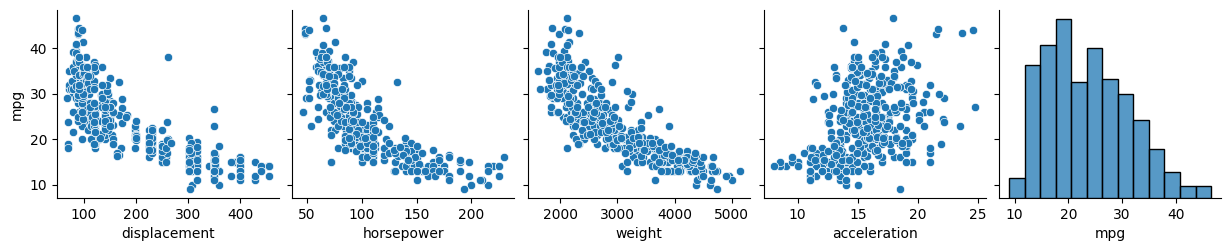

In [7]:
sns.pairplot(df, x_vars=['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

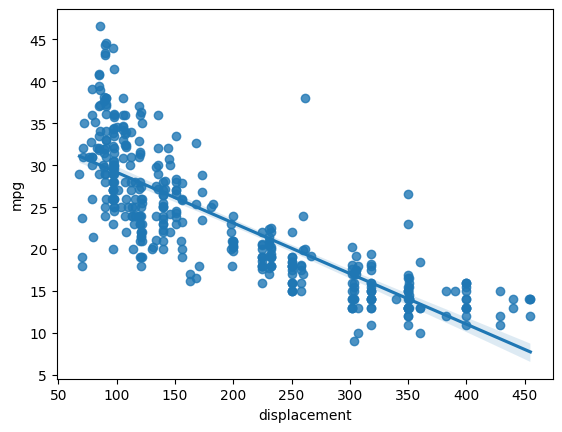

In [8]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

## **Data Preprocessing**

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## **Define Target Variable (y) and Feature Variables (X)**

In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [12]:
y = df['mpg']

In [13]:
y.shape

(392,)

In [14]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [15]:
x.shape

(392, 4)

In [16]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


### Data Scalling

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [18]:
x = ss.fit_transform(x)

In [19]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]],
      shape=(392, 4))

In [20]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


## **Train Test Split**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=2529)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((117, 4), (275, 4), (117,), (275,))

## **Modeling**

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
model.fit(x_train, y_train)

LinearRegression()

In [26]:
model.intercept_

np.float64(23.601118059983822)

In [27]:
model.coef_

array([-1.07085922, -0.64133484, -5.18021642,  0.26756035])

Mileage = 23.60 - 1.07 x Displacement - 0.54 x horsepower - 5.18 x weight - 0.26 x accelaration + error

## **Prediction**

In [28]:
y_pred = model.predict(x_test)

In [29]:
y_pred

array([18.83232615, 14.67689764, 13.90916105, 23.48706843, 30.25543552,
       23.46671071, 27.28163576, 24.60121655, 14.40764431, 10.81692289,
       24.30874146, 27.9134718 , 31.87135668, 31.42289874, 17.69562279,
       19.09989244, 28.60563403, 32.67685665, 31.45063299, 27.35959705,
       18.46314382, 22.19920123, 26.2982957 , 33.03335117, 20.48801313,
        9.54351607, 22.40016431, 18.3349025 , 24.90567933, 17.72005616,
       23.00135022, 16.88953804, 10.57530881, 30.26775706, 20.13255834,
       29.29639211, 24.89285218, 21.37238187,  9.68643504, 12.73666785,
       20.95618571, 20.11237202,  6.42862798, 17.31748152, 22.17367358,
       29.47288305, 13.72946495, 25.84603835, 30.3260242 , 22.49617884,
       21.32125793, 16.21218023, 23.82532354, 30.39683971,  9.25868474,
       10.87274956, 28.51433586, 23.14656115, 20.00708585, 31.00621369,
       20.4572209 , 27.13086597, 22.2195037 , 13.80505274, 25.30799492,
       27.41913866, 15.02111221, 24.0510285 , 31.58339665, 14.71

## **Model Evaluation**

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
mean_absolute_error(y_test, y_pred)

3.3564087099398776

In [32]:
mean_absolute_percentage_error = mean_absolute_error(y_test, y_pred) / np.mean(y_test) * 100
mean_absolute_percentage_error

np.float64(14.280601467238085)

In [33]:
mean_squared_error(y_test, y_pred)

18.66906130306789

In [34]:
r2_score(y_test, y_pred)

0.6923289624942408

Mileage = 23.60 - 1.07 x Displacement - 0.54 x horsepower - 5.18 x weight - 0.26 x accelaration + error(3.35)

## **Explaination**

The project aims to develop a predictive model to estimate the fuel efficiency of vehicles, measured in miles per gallon (mpg), based on various vehicle attributes. The dataset used contains information about vehicle specifications such as engine displacement, horsepower, weight, acceleration, and other features.

### Key Steps:
1. **Data Exploration**: The dataset was explored to understand its structure, data types, and unique values. Missing values were handled by dropping rows with null entries.
2. **Feature Selection**: Relevant features such as displacement, horsepower, weight, and acceleration were selected as predictors, while mpg was chosen as the target variable.
3. **Data Scaling**: The features were scaled using `StandardScaler` to normalize the data for better performance in regression modeling.
4. **Train-Test Split**: The dataset was split into training and testing sets with a 70-30 ratio to evaluate the model's performance.
5. **Modeling**: A linear regression model was trained on the training data to predict mpg based on the selected features.
6. **Evaluation**: The model's performance was evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²). The model achieved a reasonable level of accuracy in predicting mpg.

### Conclusion:
The linear regression model provides a mathematical equation to predict mpg based on vehicle attributes. The model's coefficients indicate the impact of each feature on mpg. For example, an increase in weight negatively impacts mpg, as shown by the negative coefficient for weight. The model can be further improved by exploring additional features, handling multicollinearity, or using advanced regression techniques.